In [15]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray

In [18]:
# Define filepath
filepath = '/Users/nicogouveia/Desktop/geog490/geospatial-data-science/labs/lab4/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'landsat/*.tif'))
print(files)

['/Users/nicogouveia/Desktop/geog490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B1.tif', '/Users/nicogouveia/Desktop/geog490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B2.tif', '/Users/nicogouveia/Desktop/geog490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B3.tif', '/Users/nicogouveia/Desktop/geog490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B4.tif', '/Users/nicogouveia/Desktop/geog490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B5.tif', '/Users/nicogouveia/Desktop/geog490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B6.tif', '/Users/nicogouveia/Desktop/geog490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B7.tif', '/Users/nicogouveia/Desktop/geog490/geospatial-data-science/labs/lab4/landsat/rgb.

In [37]:
# Read data
xds = xarray.open_dataset(filepath + 'era/usa_t2m_tcc_2020.nc', decode_coords='all')
# resample
xds_daily = xds.resample(time='1D').mean()
xds_daily

<xarray.Dataset>
Dimensions:    (time: 366, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 280.6 281.4 ... 296.3 296.2
    tcc        (time, latitude, longitude) float32 0.9765 0.8814 ... 0.2124

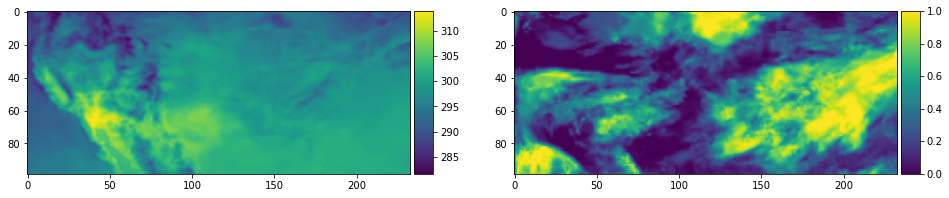

In [38]:
# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(xds_daily['t2m'][226,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax2.imshow(xds_daily['tcc'][226,:,:])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

In [44]:
# Next, find the index of the grid point nearest a specific lat/lon.   
florence_weather = xds_daily.sel(latitude=43.974659, longitude=-124.103142, method='nearest')
eugene_weather = xds_daily.sel(latitude=44.052071, longitude=-123.086754, method='nearest')

/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.g

In [45]:
# Note: Aug 14 is DOY 226 - Jan 31 is 30, Feb 15 is 45


In [46]:
fahrenheit = (florence_weather['t2m'][30].values - 273.15) * 9/5 + 32
print('Air temperature in Florence on January 31st, 2020 = %.2f F' % (fahrenheit))
print('Cloud cover in Florence on January 31st, 2020 = %.2f %%' % (florence_weather['tcc'][45].values * 100))

fahrenheit = (eugene_weather['t2m'][45].values - 273.15) * 9/5 + 32
print('Air temperature in Eugene on Feb 15th, 2020 = %.2f F' % (fahrenheit))
print('Cloud cover in Florence on Feb 15th, 2020 = %.2f %%' % (florence_weather['tcc'][45].values * 100))

Air temperature in Florence on January 31st, 2020 = 53.82 F
Cloud cover in Florence on January 31st, 2020 = 100.00 %
Air temperature in Eugene on Feb 15th, 2020 = 42.00 F
Cloud cover in Florence on Feb 15th, 2020 = 100.00 %


***********
## Question 1 (10 points): 

Now that we have gone through some examples in the lecture and lab we are ready to apply some of these methods ourselves. Start by making a **new** `jupyter notebook` called `lab4_submission.ipynb` and complete the following tasks. 

Find the following numbers in the climate reanalysis dataset:

* a) the air temperature (in F) **and** cloud cover (in %) in Florence, OR (in 2020) on **January 31, 2020**?
* b) the air temperature (in F) **and** cloud cover (in %) in **Eugene, OR** (in 2020) on **February 15, 2020**?

You can use the following table to convert from a **date** to a **day-of-year**: https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html

In [78]:
# HINT use argmax() or argmin()
max_temp_value = np.mean(xds_daily['t2m'], axis=0).argmax()
index = np.unravel_index(max_temp_value, np.mean(xds_daily['t2m'], axis=0).shape)
max_temp_loc = np.mean(xds_daily['t2m'], axis=0)[index]

min_temp_value = np.mean(xds_daily['t2m'], axis=0).argmin()
index = np.unravel_index(min_temp_value, np.mean(xds_daily['t2m'], axis=0).shape)
min_temp_loc = np.mean(xds_daily['t2m'], axis=0)[index]

max_cc_value = np.mean(xds_daily['tcc'], axis=0).argmax()
index = np.unravel_index(max_cc_value, np.mean(xds_daily['tcc'], axis=0).shape)
max_cc_loc = np.mean(xds_daily['tcc'], axis=0)[index]

min_cc_value = np.mean(xds_daily['tcc'], axis=0).argmin()
index = np.unravel_index(min_value, np.mean(xds_daily['tcc'], axis=0).shape)
min_cc_loc = np.mean(xds_daily['tcc'], axis=0)[index]

print("B)The min temp location is Shoshone National Forest, Cody, WY  82414, United States.")
print("A)The max temp location is 83325 Hermosillo, SON, Mexico.")
print("D)The min cloud cover location is Gulf of California, Mexico.")
print("C)The max cloud cover location is Two Rivers Arm, Alberni-Clayoquot Regional District BC, Canada.")

B)The min temp location is Shoshone National Forest, Cody, WY  82414, United States.
A)The max temp location is 83325 Hermosillo, SON, Mexico.
D)The min cloud cover location is Gulf of California, Mexico.
C)The max cloud cover location is Two Rivers Arm, Alberni-Clayoquot Regional District BC, Canada.


In [102]:
daily_max =np.max(xds_daily['t2m'], axis =0)
daily_min =np.min(xds_daily['t2m'], axis = 0)
temp_range= daily_max - daily_min
max_range=temp_range.argmax()
max_range_index = np.unravel_index(max_range, np.max(xds_daily['t2m'], axis=0).shape)
max_range_index
max_range_loc = np.max(xds_daily['t2m'], axis =0)[max_range_index]
max_range_loc
print("E) The max range location is Girardville QC, Canada.")

min_value = daily_min.argmin()
min_value_index = np.unravel_index(min_value, np.min(xds_daily['t2m'], axis = 0).shape)
min_value_loc = np.min(xds_daily['t2m'], axis = 0)[min_value_index]
min_value_loc
print("F) The min temperature location is Galata, MT  59444, United States.")


E) The max range location is Girardville QC, Canada.
D) The min temperature location is Galata, MT  59444, United States.


*******
## Question 2 (20 points):

Find the following grid cells in the climate reanalysis dataset and provide the lat/lons **and** a rough location of where they are located. 

* a) Highest average air temperature (i.e. hottest place)
* b) Lowest average air temperature (i.e. coldest place)
* c) Highest average cloudiness (i.e. cloudiest place)
* d) Lowest average cloudiest (i.e. least cloudy place)
* e) Place with highest range in **daily** air temperature
* f) Place with the absolute coldest temperature on a single day 

You can copy and paste the lat/lons into Google Maps to find a rough location of where these places are. 



**********

## Question 3 (20 points): 

Display the Landsat image of Florence, OR as:

* a) an **NDVI** image (i.e. (Band 5 - Band 4) / (Band 5 + Band 4))
* b) a **color infrared composite** (i.e. bands 5, 4, 3)


In [103]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

# Convert from list of arrays to n-dimensional array
all_bands = np.dstack(list_bands)


In [108]:
all_bands_image = np.uint8((all_bands / 65536) * 255)

In [111]:
# Get corners of dataset
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

In [107]:
# Produce a new array by stacking the  bands
color_infrared_composite = np.dstack((all_bands_image[:,:,4],all_bands_image[:,:,3],all_bands_image[:,:,2]))

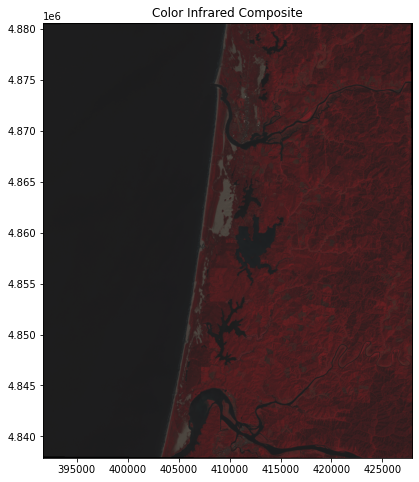

In [113]:
# Plot as RGB image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(color_infrared_composite, extent=full_extent)
ax.set_title("Color Infrared Composite")
plt.show()

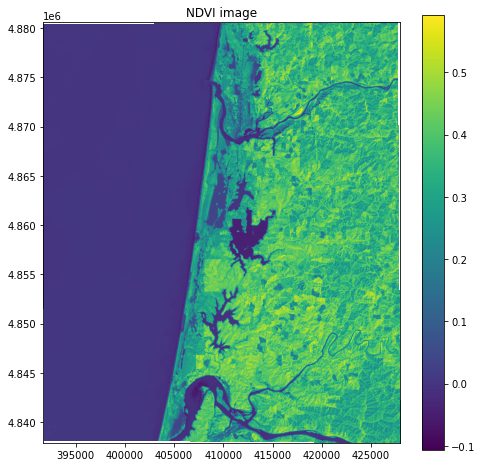

In [116]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndwi = np.divide((all_bands[:,:,4].astype(float) - all_bands[:,:,3].astype(float)), \
                 (all_bands[:,:,4].astype(float) + all_bands[:,:,3].astype(float)))
# Plot NDVI image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndwi, extent=full_extent)
ax.set_title("NDVI image")
fig.colorbar(im, orientation='vertical')
plt.show()





*********

## Question 4 (for grad students/extra credit)

* a) Produce an NDWI histogram for the Landsat image of Florence 
* b) Choose a threshold and produce a binary water mask
* c) Compute the area of water in the image (including ocean)


## Remember to submit your answers to Questions 1, 2 and 3 **by Friday 11:59pm**

In [123]:
# Compute NDWI
np.seterr(divide='ignore', invalid='ignore')
ndwi = np.divide((all_bands[:,:,2].astype(float) - all_bands[:,:,4].astype(float)), \
                 (all_bands[:,:,2].astype(float) + all_bands[:,:,4].astype(float)))

# Plot NDWI histogram

# define window size, output and axes
fig, ax = plt.subplots(figsize=[8,6])

# set plot title
ax.set_title("NDWI hist")

# set x-axis name
ax.set_xlabel("NDWI Value")

# set y-axis name
ax.set_ylabel("Value count")

# create histogram within output
N, bins, patches = ax.hist(ndwi, bins=50, color="#777777") #initial color of all bins

# Iterate through all histogram elements
# each element in this interation is one patch on the histogram, where:
# - bin_size - number of records in current bin
# - bin - value of current bin (x-axis)
# - patch - a rectangle, object of class matplotlib.patches.Patch
# more details on patch properties: [visit this link][1]
for bin_size, bin, patch in zip(N, bins, patches):
    if bin_size == <some number>:
        patch.set_facecolor("#FF000")
        patch.set_label("something")
plt.show()


SyntaxError: invalid syntax (1400472152.py, line 30)